In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd
from scipy import optimize 
from scipy import stats 
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import cm

In [2]:
df=pd.read_csv("temporarydata.csv")

In [3]:
df.head()

,Date,Daily Average Temperature (F),Daily Maximum Temperature (F),Daily Minimum Temperature (F)
0,1/1/00,37.5,43,32
1,1/2/00,45.0,56,34
2,1/3/00,33.0,36,30
3,1/4/00,24.5,30,19
4,1/5/00,16.0,25,7


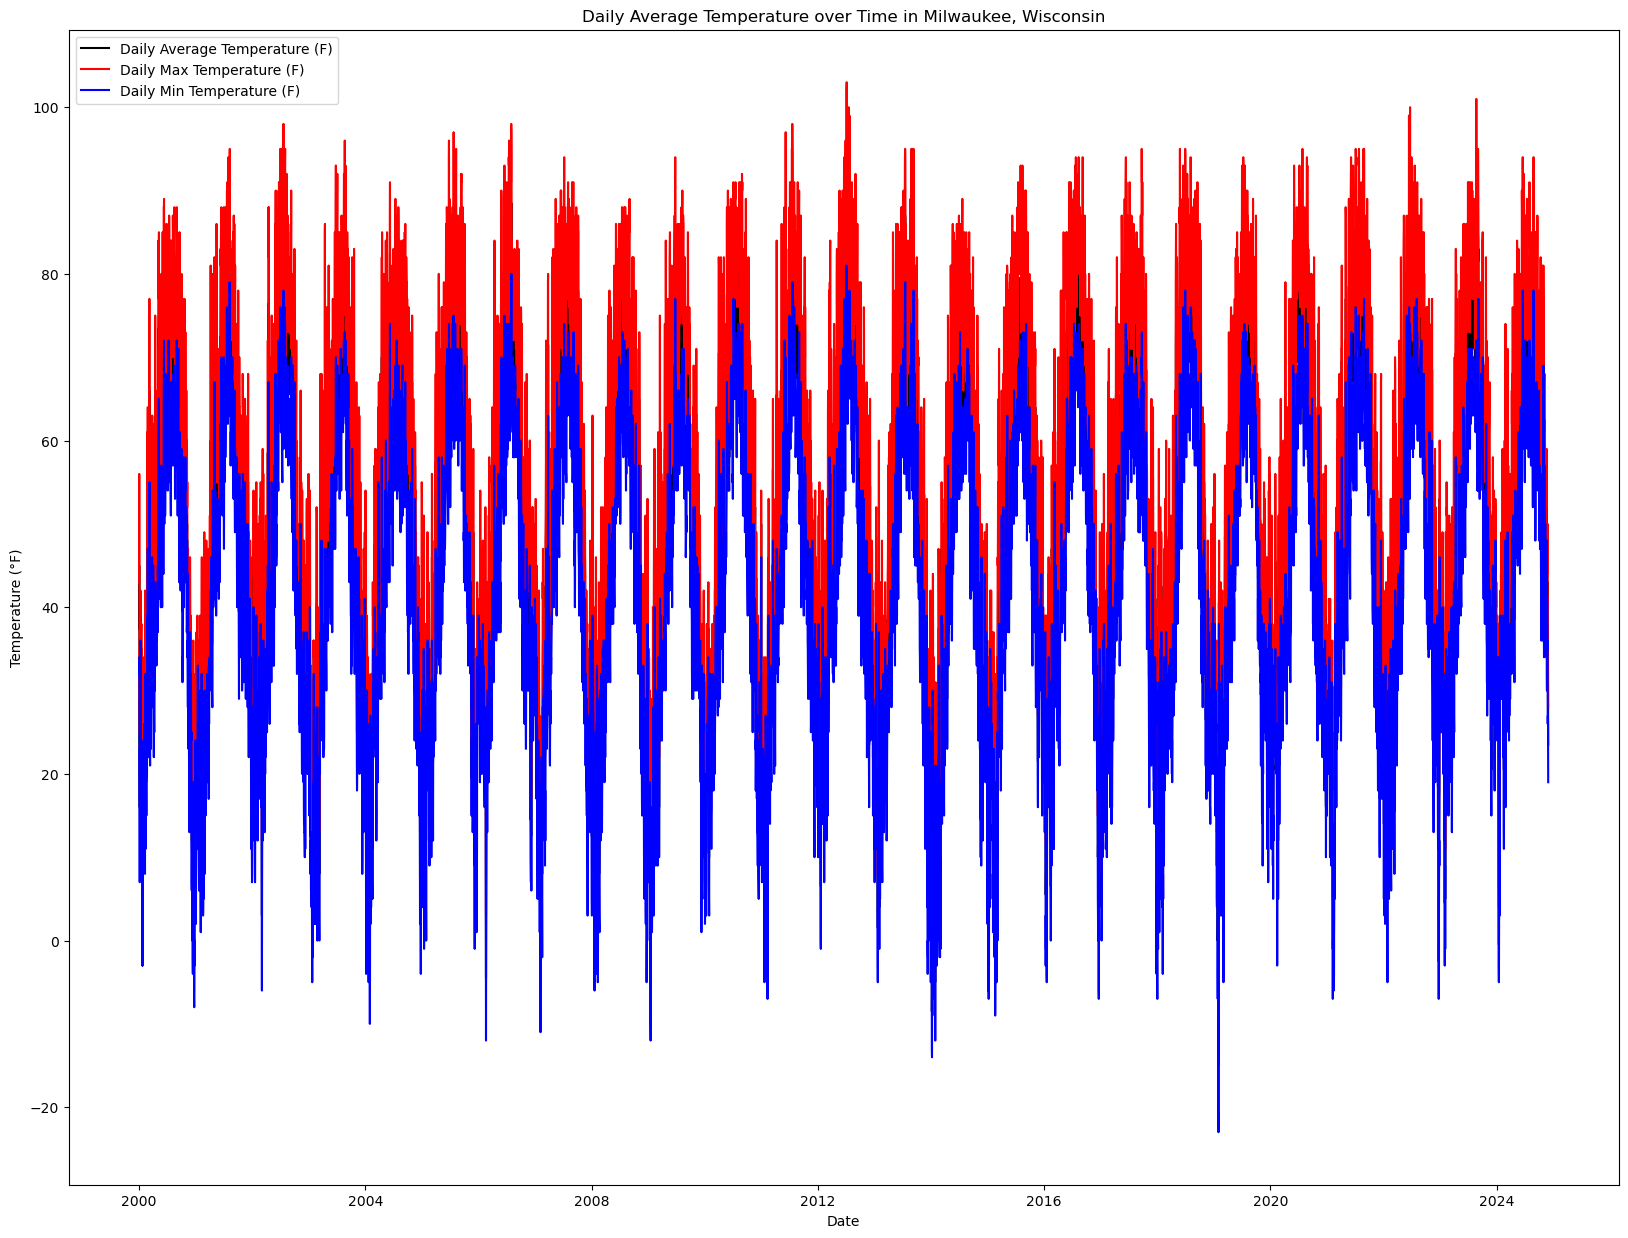

In [4]:
df['Date']=pd.to_datetime(df.iloc[:, 0], format='%m/%d/%y', errors='coerce')
time=(df['Date']-df['Date'].iloc[0]).dt.days
temperature=pd.to_numeric(df.iloc[:, 1],errors='coerce')
fig, axes=plt.subplots(1,1, figsize =(20,15))
axes.plot(df['Date'],df['Daily Average Temperature (F)'],label ="Daily Average Temperature (F)",color="black")
axes.plot(df['Date'],df['Daily Maximum Temperature (F)'],label= "Daily Max Temperature (F)",color="red")
axes.plot(df['Date'],df['Daily Minimum Temperature (F)'],label ="Daily Min Temperature (F)",color="blue")
axes.set_title("Daily Average Temperature over Time in Milwaukee, Wisconsin")
axes.set_xlabel("Date")
axes.set_ylabel("Temperature (°F)")
axes.legend(loc="best")
plt.show()

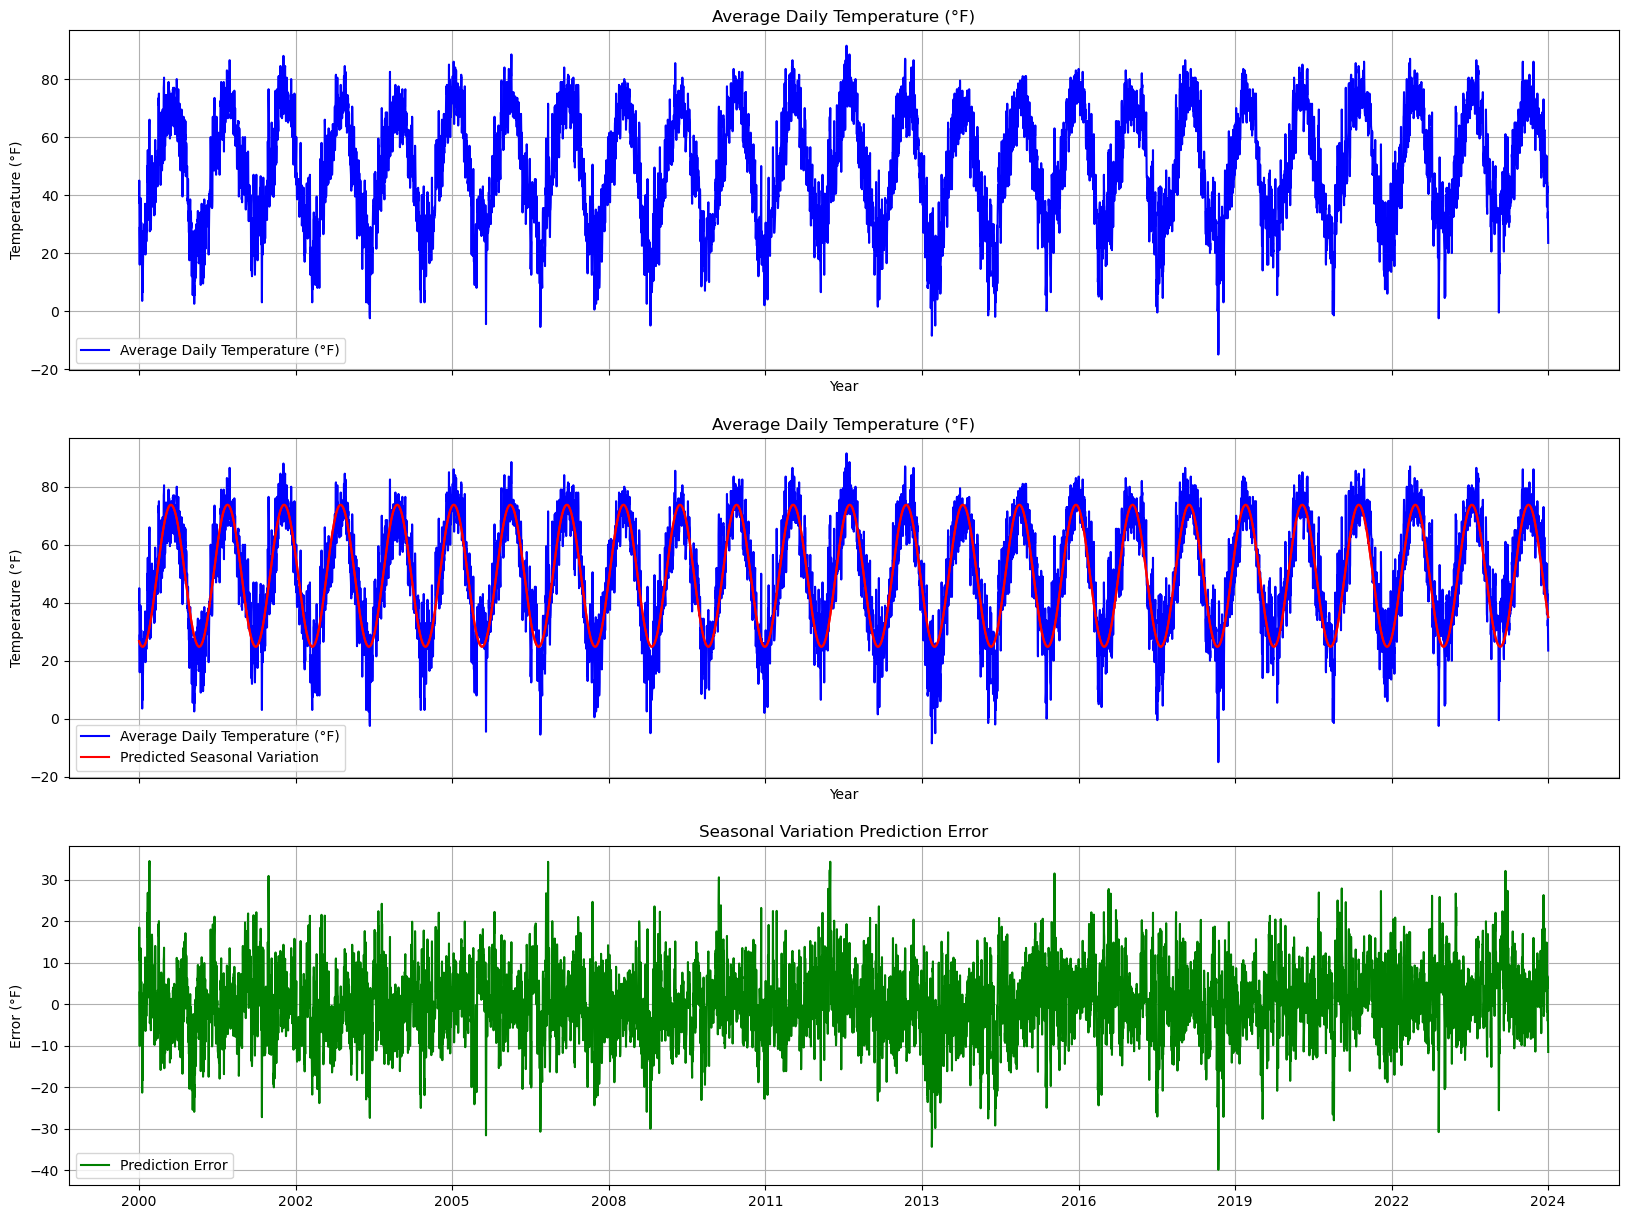

In [5]:
def seasonalvariation(x, a, b, c):
    P=365.25
    return a*np.cos((2*np.pi/P)*x)+b*np.sin((2*np.pi/P)*x)+c
temperature=pd.to_numeric(df.iloc[:, 1],errors='coerce')
p,covariance=optimize.curve_fit(seasonalvariation,xdata=time,ydata=temperature)
a,b,c =p
predicted_temperature_seasonal=seasonalvariation(time,a,b,c)
error_seasonal=temperature-predicted_temperature_seasonal

start_date=df['Date'].iloc[0]
years=(df['Date'] -start_date).dt.days/365.25 + 2000  

fig, ax = plt.subplots(3,1,figsize=(20, 15),sharex=True)
ax[0].plot(years,temperature,label='Average Daily Temperature (°F)',color='blue') #first plot to show raw data
ax[0].set_title('Average Daily Temperature (°F)')
ax[0].set_ylabel('Temperature (°F)')
ax[0].set_xlabel('Year')
ax[0].legend()
ax[0].grid(True)
ax[1].plot(years,temperature,label='Average Daily Temperature (°F)', color='blue') #second plot to show data with model fit
ax[1].plot(years,predicted_temperature_seasonal,label='Predicted Seasonal Variation',color='red')
ax[1].set_title('Average Daily Temperature (°F)')
ax[1].set_ylabel('Temperature (°F)')
ax[1].set_xlabel('Year')
ax[1].legend()
ax[1].grid(True)
ax[1].plot(years,predicted_temperature_seasonal,label='Predicted Temperature due to Seasonal Variation', color='red')
ax[1].set_xticks(np.linspace(min(years), max(years), num=10))
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
ax[2].plot(years, error_seasonal,label='Prediction Error',color='green') #third plot to show prediction error model 1
ax[2].set_title('Seasonal Variation Prediction Error')
ax[2].set_ylabel('Error (°F)')
ax[1].set_xlabel('Year')
ax[2].legend()
ax[2].grid(True)
plt.show()

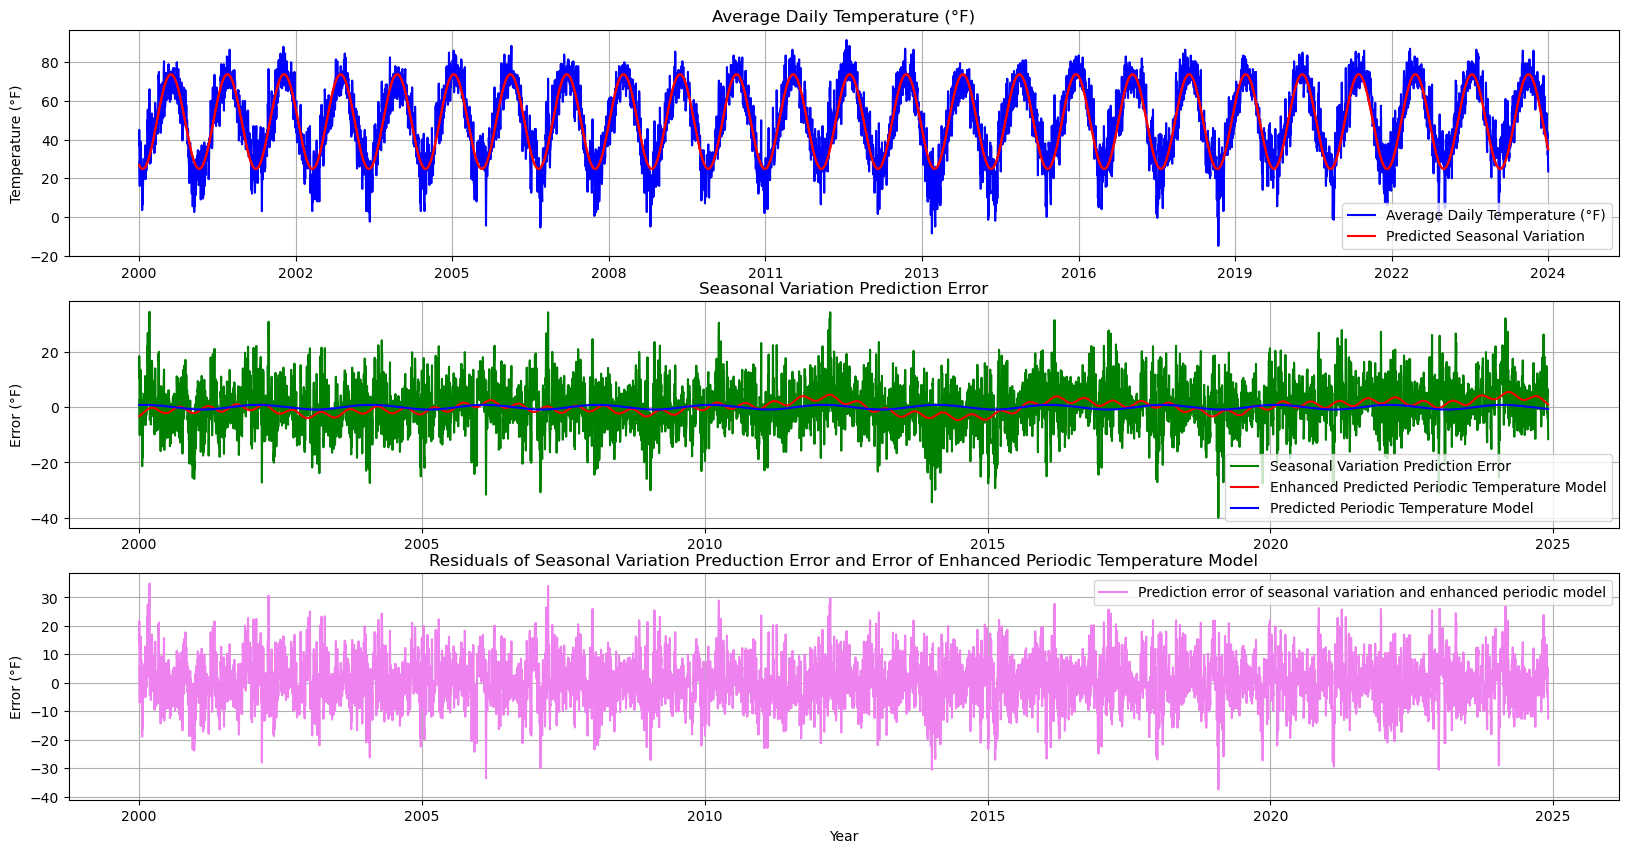

In [6]:
#creating a better model of the prediction error
def fourier_series(x, a0, a1, b1, a2, b2, a3, b3, a4, b4, a5, b5, a6, b6, a7, b7, a8, b8, a9, b9, a10, b10, c):
    period_1=365.25 
    period_2=365.25* 2
    period_3=365.25* 3
    period_4=365.25* 4
    period_5=365.25* 5
    period_6=365.25* 6
    period_7=365.25* 7
    period_8=365.25* 8
    period_9=365.25* 9
    period_10=365.25* 0.5
    
    return a0 + a1 * np.cos(2 * np.pi * x / period_1) + b1 * np.sin(2 * np.pi * x / period_1) + a2 * np.cos(2 * np.pi * x / period_2) + b2 * np.sin(2 * np.pi * x / period_2) + a3 * np.cos(2 * np.pi * x / period_3) + b3 * np.sin(2 * np.pi * x / period_3) + a4 * np.cos(2 * np.pi * x / period_4) + b4 * np.sin(2 * np.pi * x / period_4) + a5 * np.cos(2 * np.pi * x / period_5) + b5 * np.sin(2 * np.pi * x / period_5)+a6 * np.cos(2 * np.pi * x / period_6) + b6 * np.sin(2 * np.pi * x / period_6)+a7 * np.cos(2 * np.pi * x / period_7) + b7 * np.sin(2 * np.pi * x / period_7)+a8 * np.cos(2 * np.pi * x / period_8) + b8 * np.sin(2 * np.pi * x / period_8)+a9 * np.cos(2 * np.pi * x / period_9) + b9 * np.sin(2 * np.pi * x / period_9)+a10 * np.cos(2 * np.pi * x / period_10) + b10 * np.sin(2 * np.pi * x / period_10) + c*x
p_fourier, _ = optimize.curve_fit(fourier_series, xdata=time, ydata=error_seasonal) 
a0,a1,b1,a2,b2,a3,b3,a4,b4,a5,b5,a6,b6,a7,b7,a8,b8,a9,b9,a10,b10,c=p_fourier
predicted_error_fourier = fourier_series(time, a0, a1, b1, a2, b2, a3, b3, a4, b4, a5, b5, a6, b6, a7, b7, a8, b8, a9, b9, a10, b10, c)
error_fourier=error_seasonal-predicted_error_fourier  

def fourier_series_basic(x, a0, a1, b1, a2, b2):
    period_1=365.25 
    period_2=365.25 * 2 
    return a0 + a1 * np.cos(2 * np.pi * x / period_1) + b1 * np.sin(2 * np.pi * x / period_1) + a2 * np.cos(2 * np.pi * x / period_2) + b2 * np.sin(2 * np.pi * x / period_2)
p_fourier_basic, _ =optimize.curve_fit(fourier_series_basic, xdata=time, ydata=error_seasonal) 
a0, a1, b1, a2, b2 = p_fourier_basic
predicted_error_fourier_basic=fourier_series_basic(time, a0, a1, b1, a2, b2)
error_fourier_basic=error_seasonal-predicted_error_fourier_basic  

fig, ax = plt.subplots(3,1,figsize=(20,10))
ax[0].plot(years, temperature, label='Average Daily Temperature (°F)', color='blue') #first plot again to show original data, now with seasonal variation model 
ax[0].plot(years, predicted_temperature_seasonal, label='Predicted Seasonal Variation', color='red')
ax[0].set_title('Average Daily Temperature (°F)')
ax[0].set_ylabel('Temperature (°F)')
ax[0].legend()
ax[0].grid(True)
ax[0].plot(years, predicted_temperature_seasonal, label='Predicted Temperature due to Seasonal Variation', color='red')
ax[0].set_xticks(np.linspace(min(years), max(years), num=10)) #I had help with this
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
ax[1].plot(years, error_seasonal, label='Seasonal Variation Prediction Error', color='green') #second plot to show seasonal prediction model error with new associated models for residuals graph
ax[1].plot(years, predicted_error_fourier, label='Enhanced Predicted Periodic Temperature Model', color='red')
ax[1].plot(years, predicted_error_fourier_basic, label='Predicted Periodic Temperature Model', color='blue')
ax[1].set_title('Seasonal Variation Prediction Error')
ax[1].set_ylabel('Error (°F)')
ax[1].legend()
ax[1].grid(True)
ax[2].plot(years, error_fourier, label='Prediction error of seasonal variation and enhanced periodic model', color='violet') #third plot to show residuals graph with no additional models 
ax[2].set_title('Residuals of Seasonal Variation Preduction Error and Error of Enhanced Periodic Temperature Model')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Error (°F)')
ax[2].legend()
ax[2].grid(True)
plt.show()

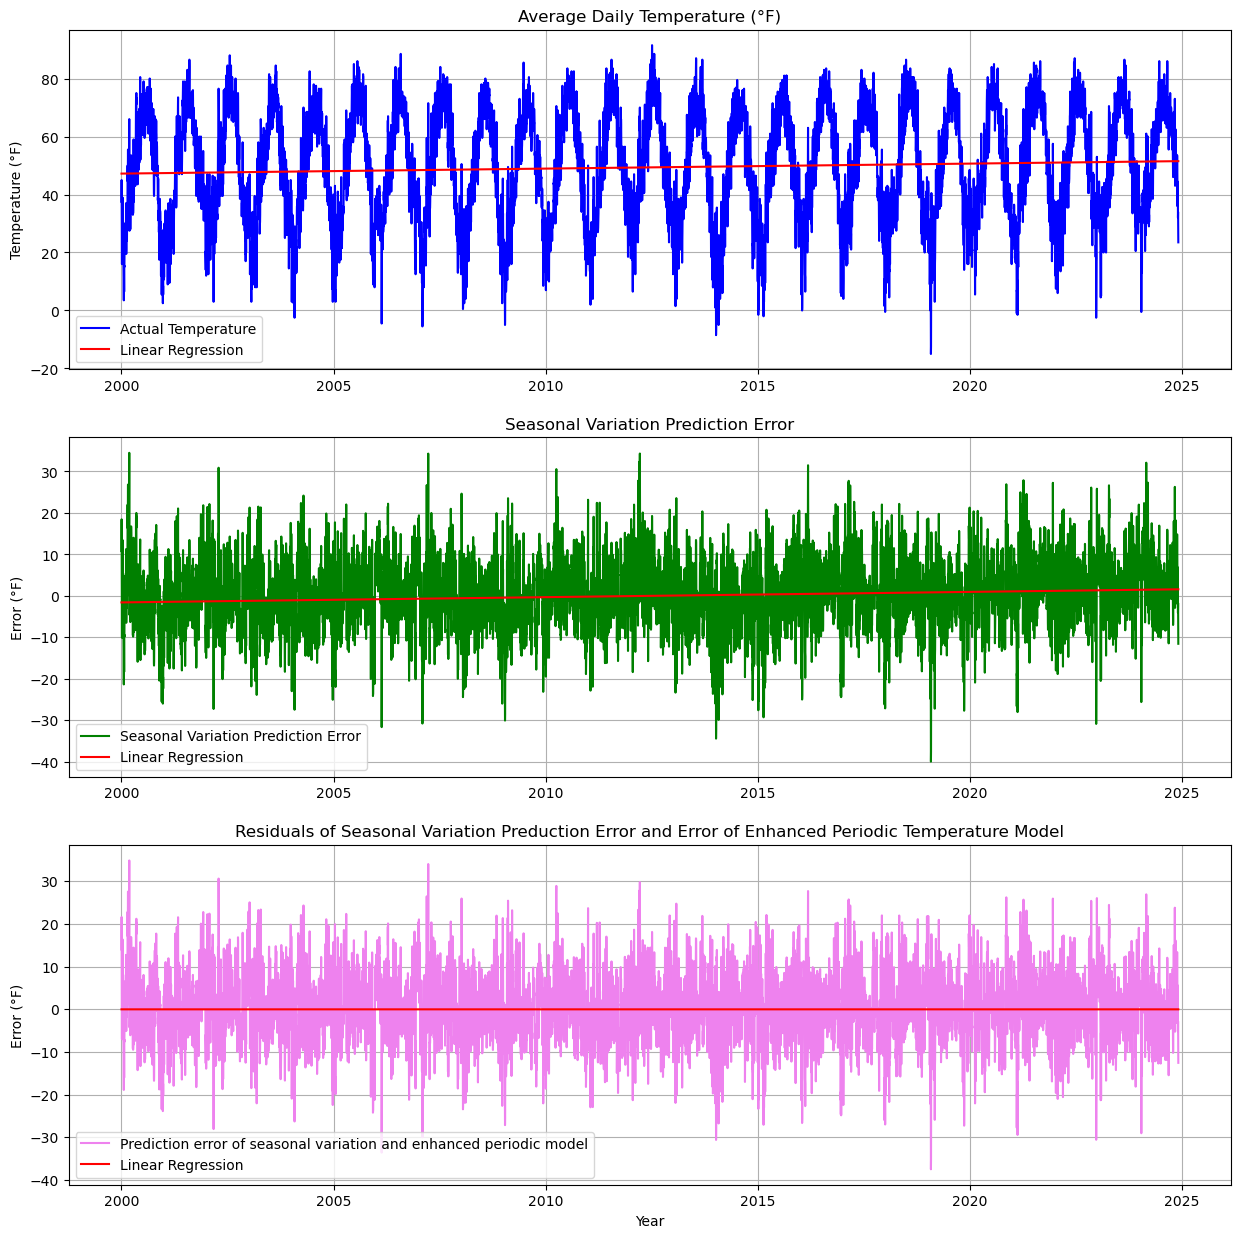

Linear regression of original data: Y = 0.00047x + 47.20995, R^2: 0.00413
Linear regression of seasonal variation preduction error: Y = 0.00035x + -1.57863, R^2: 0.01150
Linear regression of residuals graph: Y = -0.00000x + 0.00000, R^2: 0.00000


In [7]:
def linreg(x, y):
    slope, intercept, r_value, p_value, std_err =stats.linregress(x, y)
    linear_fit=slope*x+intercept
    return linear_fit, slope, intercept, r_value**2

linoriginal,slope_original,intercept_original,r_squared_original=linreg(time, temperature)
linseasonal, slope_seasonal,intercept_seasonal,r_squared_seasonal=linreg(time, error_seasonal)
linfinal, slope_fourier,intercept_fourier,r_squared_fourier =linreg(time, error_fourier)

fig, ax =plt.subplots(3, 1, figsize=(15, 15))
ax[0].plot(years, temperature, label='Actual Temperature', color='blue') #linear regression model of original data for comparison 
ax[0].plot(years, linoriginal, label='Linear Regression', color='red')
ax[0].set_title('Average Daily Temperature (°F)')
ax[0].set_ylabel('Temperature (°F)')
ax[0].legend()
ax[0].grid(True)
ax[1].plot(years, error_seasonal, label='Seasonal Variation Prediction Error', color='green') #linear regression model of seasonal variation prediction model again for comparison 
ax[1].plot(years, linseasonal, label='Linear Regression', color='red')
ax[1].set_title('Seasonal Variation Prediction Error')
ax[1].set_ylabel('Error (°F)')
ax[1].legend()
ax[1].grid(True)
ax[2].plot(years, error_fourier, label='Prediction error of seasonal variation and enhanced periodic model', color='violet') #most important model: linear regression of residuals graph, hopefully showcases any general trends that transcend oscillatory trends 
ax[2].plot(years, linfinal, label='Linear Regression', color='red')
ax[2].set_title('Residuals of Seasonal Variation Preduction Error and Error of Enhanced Periodic Temperature Model')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Error (°F)')
ax[2].legend()
ax[2].grid(True)
plt.show()

print(f"Linear regression of original data: Y = {slope_original:.5f}x + {intercept_original:.5f}, R^2: {r_squared_original:.5f}")
print(f"Linear regression of seasonal variation preduction error: Y = {slope_seasonal:.5f}x + {intercept_seasonal:.5f}, R^2: {r_squared_seasonal:.5f}")
print(f"Linear regression of residuals graph: Y = {slope_fourier:.5f}x + {intercept_fourier:.5f}, R^2: {r_squared_fourier:.5f}")

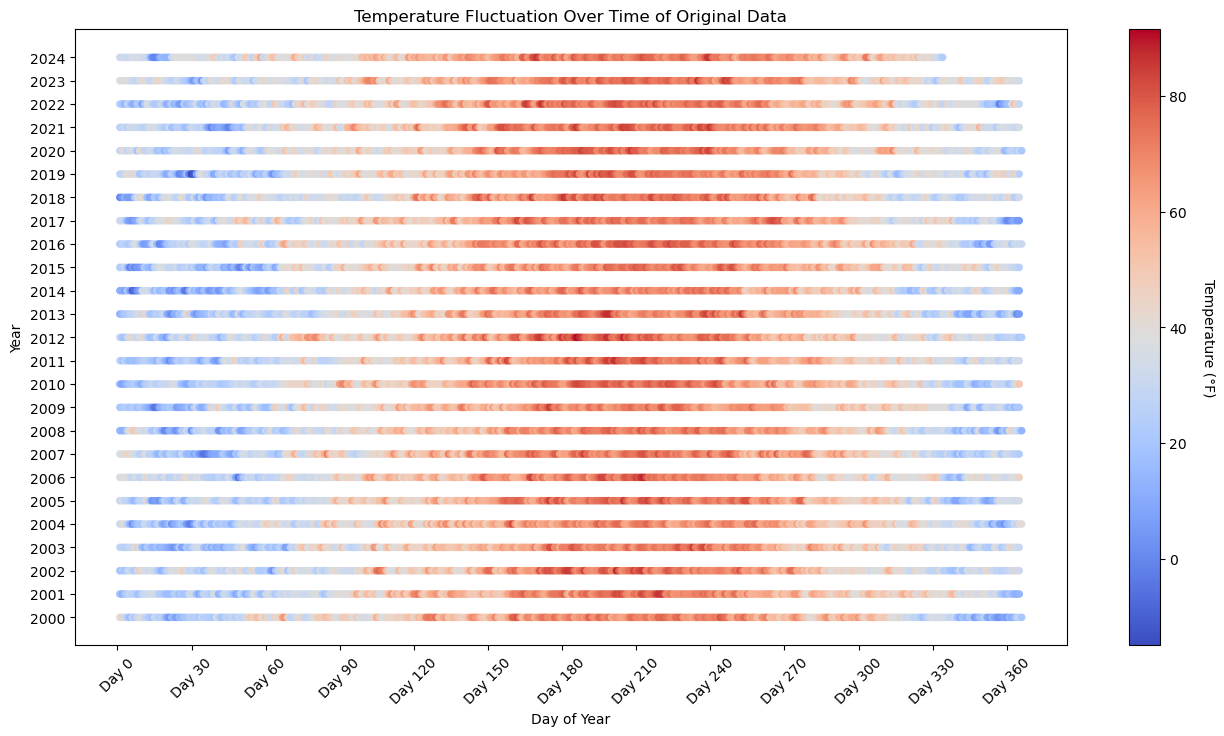

In [8]:
#ORIGINAL DATA
def abnormal_days(residuals, threshold=2): #understanding temp fluctuation over time, setting threshold and seeing what exceeds it to find abnormally hot/cold temps
    mean=residuals.mean()
    std=residuals.std()
    lower_thresh=mean-threshold*std
    upper_thresh=mean+threshold*std
    abnormal_hot=residuals>upper_thresh
    abnormal_cold=residuals<lower_thresh
    return abnormal_hot,abnormal_cold

def heatmap(df,residuals,abnormal_hot,abnormal_cold): #heatmap to understand temp variation over time
    fig,ax =plt.subplots(figsize=(16, 8))
    ax.set_xticks(np.arange(0, 366, 30))
    ax.set_xticklabels([f'Day {i}' for i in range(0, 366, 30)], rotation=45)
    df['Year']=df['Date'].dt.year
    df['DayOfYear']=df['Date'].dt.dayofyear #sep years from date for better visualization !!
    norm=Normalize(vmin=residuals.min(), vmax=residuals.max())
    ax.set_xlabel('Day of Year')
    scplot=ax.scatter(df['DayOfYear'], df['Year'], c=residuals, cmap='coolwarm', norm=norm, s=20)
    cbar=plt.colorbar(scplot, ax=ax, orientation='vertical')
    cbar.set_label('Temperature (°F)', rotation=270, labelpad=20)
    ax.set_title('Temperature Fluctuation Over Time of Original Data')
    ax.set_ylabel('Year')
    ax.set_yticks(sorted(df['Year'].unique()))
    plt.show()

residuals=temperature
abnormal_hot, abnormal_cold=abnormal_days(residuals,threshold=2)
heatmap(df,residuals,abnormal_hot,abnormal_cold)

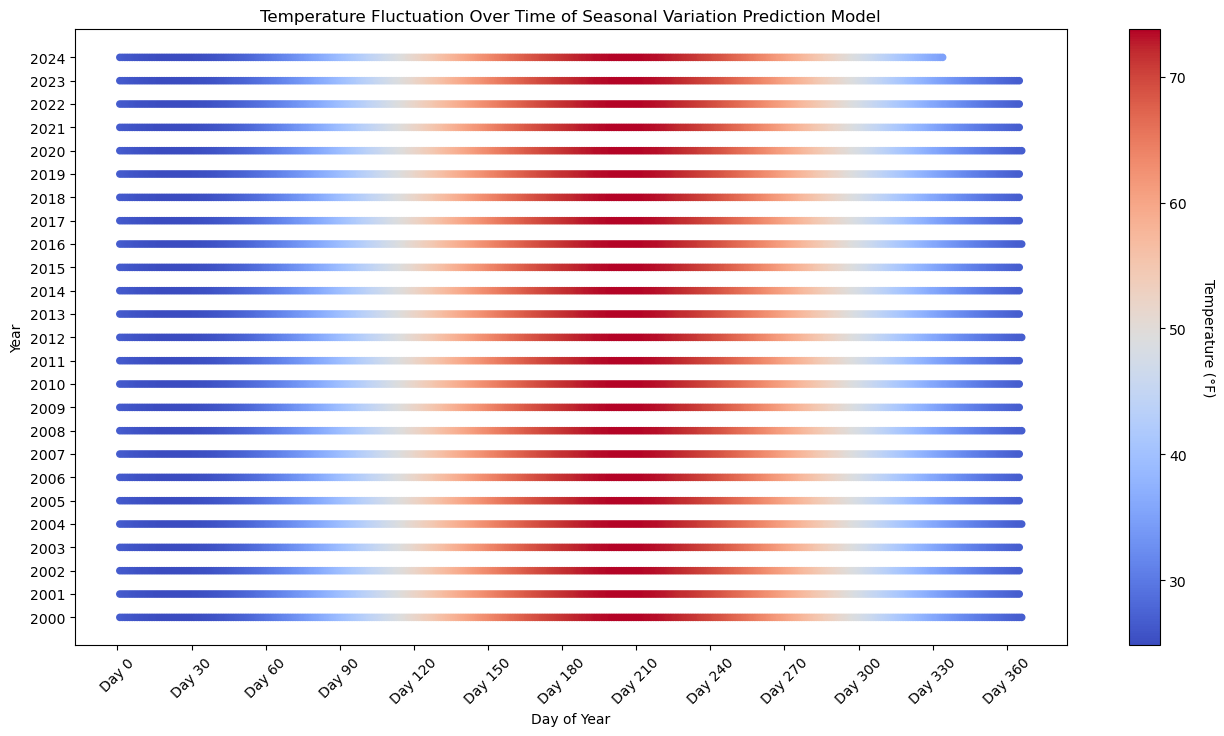

In [9]:
#SEASONAL PREDICTION PLOT
def heatmap(df, residuals, abnormal_hot, abnormal_cold): 
    fig, ax=plt.subplots(figsize=(16, 8))
    ax.set_xticks(np.arange(0, 366, 30))
    ax.set_xticklabels([f'Day {i}' for i in range(0, 366, 30)], rotation=45)
    df['Year']=df['Date'].dt.year
    df['DayOfYear']=df['Date'].dt.dayofyear 
    norm = Normalize(vmin=residuals.min(), vmax=residuals.max())
    ax.set_xlabel('Day of Year')
    scplot =ax.scatter(df['DayOfYear'], df['Year'], c=residuals, cmap='coolwarm', norm=norm, s=20)
    cbar= plt.colorbar(scplot, ax=ax, orientation='vertical')
    cbar.set_label('Temperature (°F)', rotation=270, labelpad=20)
    ax.set_title('Temperature Fluctuation Over Time of Seasonal Variation Prediction Model')
    ax.set_ylabel('Year')
    ax.set_yticks(sorted(df['Year'].unique()))
    plt.show()

residuals=predicted_temperature_seasonal 
abnormal_hot, abnormal_cold=abnormal_days(residuals, threshold=2)
heatmap(df,residuals, abnormal_hot,abnormal_cold)

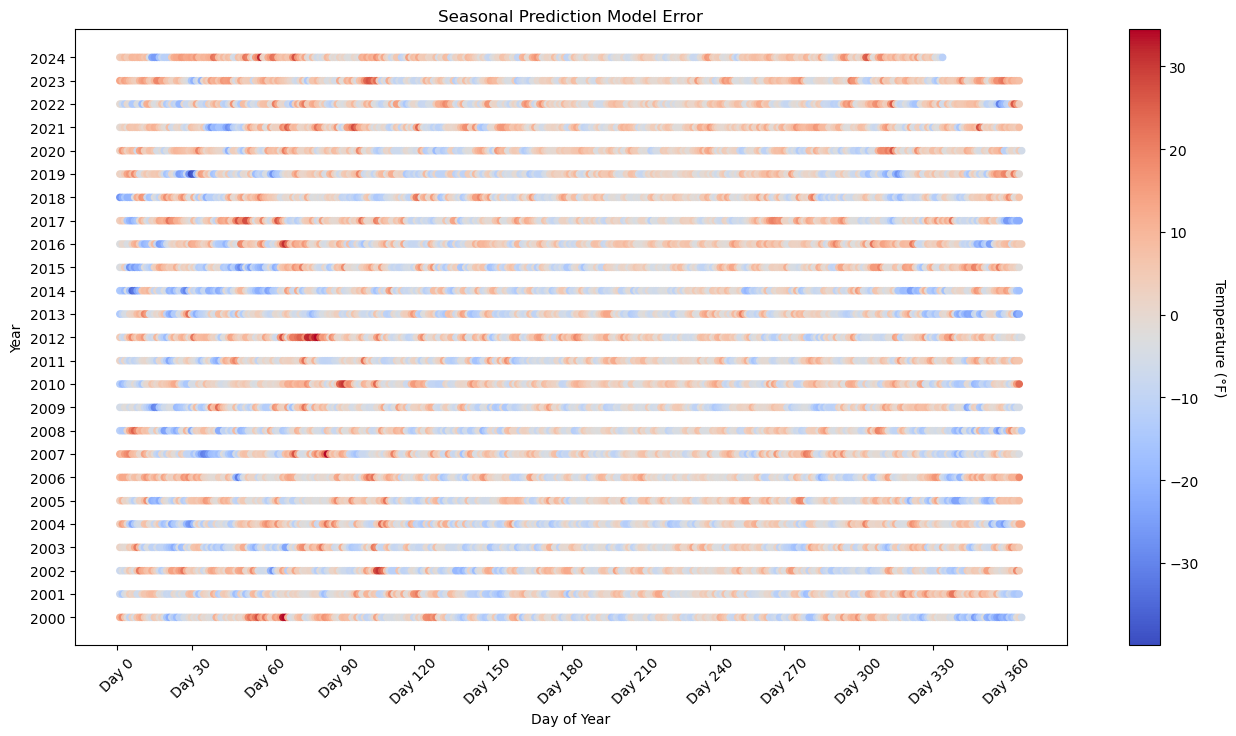

In [10]:
#FIRST ERROR PLOT
def heatmap(df, residuals, abnormal_hot,abnormal_cold): 
    fig, ax=plt.subplots(figsize=(16, 8))
    ax.set_xticks(np.arange(0, 366, 30))
    ax.set_xticklabels([f'Day {i}' for i in range(0, 366, 30)], rotation=45)
    df['Year']=df['Date'].dt.year
    df['DayOfYear']=df['Date'].dt.dayofyear 
    norm= Normalize(vmin=residuals.min(), vmax=residuals.max())
    ax.set_xlabel('Day of Year')
    scplot= ax.scatter(df['DayOfYear'], df['Year'], c=residuals, cmap='coolwarm', norm=norm, s=20)
    cbar =plt.colorbar(scplot, ax=ax, orientation='vertical')
    cbar.set_label('Temperature (°F)', rotation=270, labelpad=20)
    ax.set_title('Seasonal Prediction Model Error')
    ax.set_ylabel('Year')
    ax.set_yticks(sorted(df['Year'].unique()))
    plt.show()

residuals=error_seasonal
abnormal_hot, abnormal_cold=abnormal_days(residuals, threshold=2)
heatmap(df, residuals, abnormal_hot, abnormal_cold)

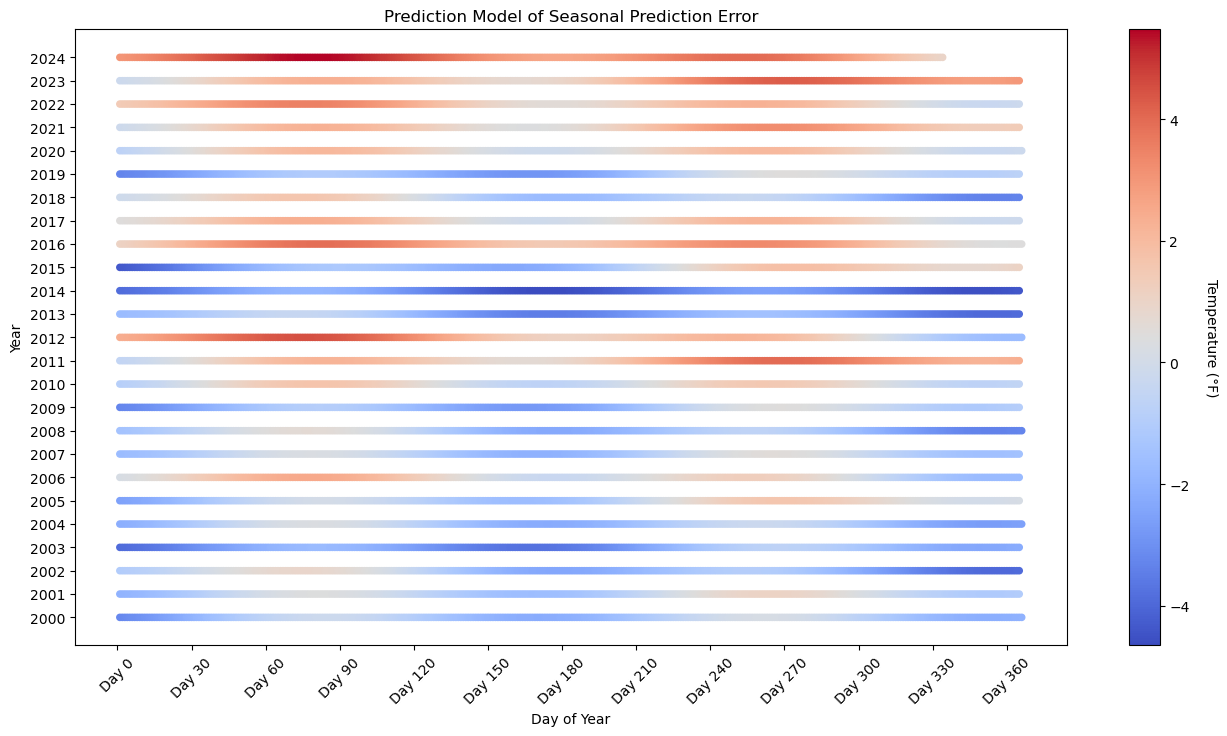

This model is interesting for showing general trends based on the prediction model after seasonal variation was removed. It shows a general increase in temperature regardless of season


In [11]:
#ERROR PREDICTION MODEL
def heatmap(df, residuals, abnormal_hot, abnormal_cold): 
    fig, ax=plt.subplots(figsize=(16, 8))
    ax.set_xticks(np.arange(0, 366, 30))
    ax.set_xticklabels([f'Day {i}' for i in range(0, 366, 30)], rotation=45)
    df['Year']=df['Date'].dt.year
    df['DayOfYear']=df['Date'].dt.dayofyear 
    norm = Normalize(vmin=residuals.min(), vmax=residuals.max())
    ax.set_xlabel('Day of Year')
    scplot = ax.scatter(df['DayOfYear'], df['Year'], c=residuals, cmap='coolwarm', norm=norm, s=20)
    cbar = plt.colorbar(scplot, ax=ax, orientation='vertical')
    cbar.set_label('Temperature (°F)', rotation=270, labelpad=20)
    ax.set_title('Prediction Model of Seasonal Prediction Error') #Creating a new model for the prediction error of the original model
    ax.set_ylabel('Year')
    ax.set_yticks(sorted(df['Year'].unique()))
    plt.show()

residuals=predicted_error_fourier
abnormal_hot, abnormal_cold=abnormal_days(residuals, threshold=2)
heatmap(df, residuals, abnormal_hot, abnormal_cold)
print("This model is interesting for showing general trends based on the prediction model after seasonal variation was removed. It shows a general increase in temperature regardless of season")


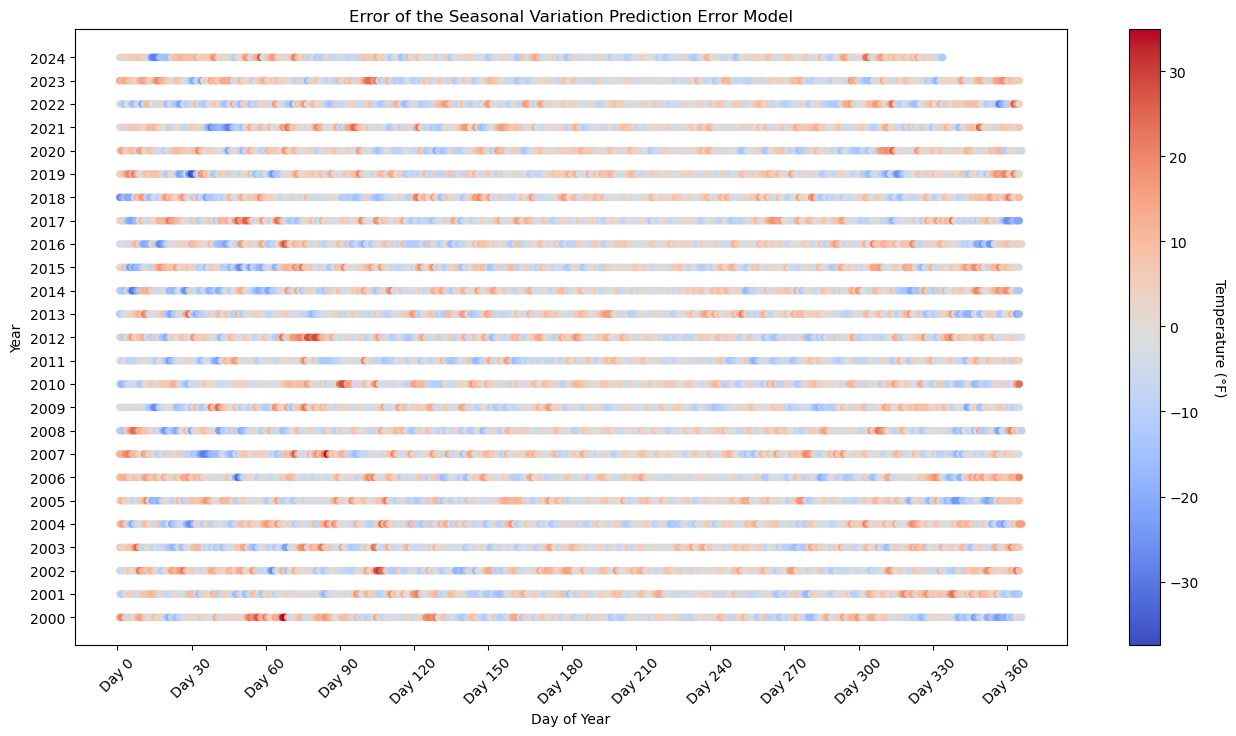

Highlights temperature fluctuations not accounted for in either prediction model


In [12]:
#ERROR OF SEASONAL ERROR PREDICTION MODEL 
def heatmap(df, residuals, abnormal_hot, abnormal_cold): 
    fig, ax=plt.subplots(figsize=(16, 8))
    ax.set_xticks(np.arange(0, 366, 30))
    ax.set_xticklabels([f'Day {i}' for i in range(0, 366, 30)], rotation=45)
    df['Year']=df['Date'].dt.year
    df['DayOfYear']=df['Date'].dt.dayofyear 
    norm=Normalize(vmin=residuals.min(), vmax=residuals.max())
    ax.set_xlabel('Day of Year')
    scplot=ax.scatter(df['DayOfYear'], df['Year'], c=residuals, cmap='coolwarm', norm=norm, s=20)
    cbar=plt.colorbar(scplot, ax=ax,orientation='vertical')
    cbar.set_label('Temperature (°F)', rotation=270, labelpad=20)
    ax.set_title('Error of the Seasonal Variation Prediction Error Model')
    ax.set_ylabel('Year')
    ax.set_yticks(sorted(df['Year'].unique()))
    plt.show()

residuals=error_fourier
abnormal_hot, abnormal_cold=abnormal_days(residuals, threshold=2)
heatmap(df, residuals, abnormal_hot,abnormal_cold)
print("Highlights temperature fluctuations not accounted for in either prediction model")